In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl

import seaborn as sns
sns.set(style="ticks", color_codes=True, font_scale=1.5)
sns.set_style({"xtick.direction": "in", "ytick.direction": "in"})
sns.set_context('paper', font_scale=1.5)

In [2]:
import mdtraj as md

### Analysis

In [3]:
#traj = md.load_xtc("data/ala5_ff99sbildn_tip3p_nowat_nvt_1.xtc", \
#                   top="data/ala5_ff99sbildn_nowat.gro")
#print (traj traj.timestep)

In [4]:
from mastermsm.trajectory import traj

In [5]:
tr = traj.TimeSeries(top='data/alaTB.gro',\
        traj=['data/ala2_ff99sbildn_tip3p_nowat_nvt_1.xtc'])
tr.mdt

<mdtraj.Trajectory with 376034 frames, 19 atoms, 3 residues, and unitcells at 0x7fb535715590>

In [6]:
tr.discretize(states=['A', 'E'])

In [7]:
tr.find_keys()
#tr.keys.sort()
#tr.keys.reverse()
print ([x for x in tr.keys])

['E', 'A']


In [8]:
from mastermsm.msm import msm
msm_ala2 = msm.SuperMSM([tr], sym=False)


 Building MSM from 
 [['data/ala2_ff99sbildn_tip3p_nowat_nvt_1.xtc']]
     # states: 2


In [9]:
for i in [2, 8, 20, 50, 100, 200, 500, 900, 1500, 2000]:
    msm_ala2.do_msm(i)
    msm_ala2.msms[i].do_trans(evecs=True)
    msm_ala2.msms[i].boots()

In [10]:
sorted(msm_ala2.msms.keys()),msm_ala2.msms[2].tau_std[0],msm_ala2.msms[900].tauT[0]

([2, 8, 20, 50, 100, 200, 500, 900, 1500, 2000],
 0.9894788775785466,
 76.75679966539413)

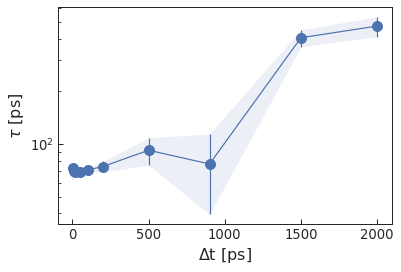

In [11]:
fig, ax = plt.subplots()
tau_vs_lagt = np.array([[x,msm_ala2.msms[x].tauT[0],msm_ala2.msms[x].tau_std[0]] \
               for x in sorted(msm_ala2.msms.keys())])
ax.errorbar(tau_vs_lagt[:,0],tau_vs_lagt[:,1],fmt='o-', yerr=tau_vs_lagt[:,2], markersize=10)
ax.fill_between(tau_vs_lagt[:,0],tau_vs_lagt[:,1]+tau_vs_lagt[:,2], \
                tau_vs_lagt[:,1]-tau_vs_lagt[:,2], alpha=0.1)
ax.set_xlabel(r'$\Delta$t [ps]', fontsize=16)
ax.set_ylabel(r'$\tau$ [ps]', fontsize=16)
#ax.set_xlim(0.8,200), #ax.set_ylim(0,60)
#_ = ax.set_xscale('log')
ax.set_yscale('log')

In [12]:
lt = 900

In [13]:
msm_ala2.msms[lt].tauT

[76.75679966539413]

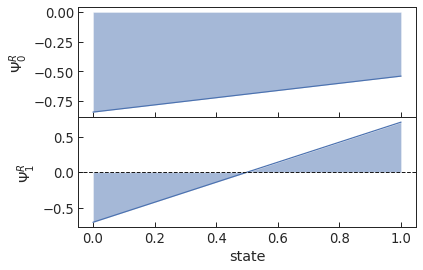

In [14]:
fig, ax = plt.subplots(2,1, sharex=True)
ax[0].plot(-msm_ala2.msms[lt].rvecsT[:,0])
ax[0].fill_between(range(len(msm_ala2.msms[lt].rvecsT[:,0])), \
                   -msm_ala2.msms[lt].rvecsT[:,0], 0, alpha=0.5)
#ax[0].set_ylim(0,0.43)

ax[1].plot(msm_ala2.msms[lt].rvecsT[:,1])
ax[1].axhline(0,0,25, c='k', ls='--', lw=1)
ax[1].fill_between(range(len(msm_ala2.msms[lt].rvecsT[:,1])), \
                   msm_ala2.msms[lt].rvecsT[:,1], 0, alpha=0.5)
#ax[1].set_xlim(0,40)
ax[1].set_xlabel("state")
ax[0].set_ylabel("$\Psi^R_0$")
ax[1].set_ylabel("$\Psi^R_1$")
plt.tight_layout(h_pad=0)

In [15]:
import h5py
h5file = "./data/ala2_all.h5"
with h5py.File(h5file, "w") as col:
    col.create_dataset("data", data=tr.distraj)
type(tr.distraj), len(tr.distraj)

(list, 376034)

NOT_RUN adaptive sampling; overall $8*10*2500=200000$ steps

In [16]:
from adaptivemastermsm import controller
from adaptivemastermsm.analyzer import analyzer

In [17]:
conc = controller.Controller(trajfiles=[h5file])
conc.adaptive_sampling(8, lt, sym=False, rate_mat=False, \
        scoring='counts', n_epochs=10, not_run=True, nsteps=2500)

     # states: 2
MSM done
sum probabilities: 1.0 2 2
Runs for new epoch: [0 0 0 0 1 1 1 0]
Building entry for microstate 0
Building entry for microstate 1
not_run info: 0 285213 0
not_run info: 0 339923 0
not_run info: 0 131661 0
not_run info: 0 47226 0
not_run info: 0 273937 1
not_run info: 0 206729 1
not_run info: 0 76277 1
not_run info: 0 272730 0
     # states: 2
MSM done
sum probabilities: 1.0 2 2
Runs for new epoch: [1 1 1 1 1 1 1 1]
Building entry for microstate 1
not_run info: 1 1313 1
not_run info: 1 1993 1
not_run info: 1 218 1
not_run info: 1 498 1
not_run info: 1 1234 1
not_run info: 1 149 1
not_run info: 1 2280 1
not_run info: 1 1085 1
     # states: 2
MSM done
sum probabilities: 1.0 2 2
Runs for new epoch: [1 1 0 1 0 0 0 0]
Building entry for microstate 1
Building entry for microstate 0
not_run info: 2 911 1
not_run info: 2 787 1
not_run info: 2 1698 0
not_run info: 2 1449 1
not_run info: 2 1721 0
not_run info: 2 933 0
not_run info: 2 1007 0
not_run info: 2 961 0
     # s

In [18]:
conf = controller.Controller(trajfiles=[h5file])
conf.adaptive_sampling(8, lt, sym=False, rate_mat=False, \
        scoring='flux', n_epochs=10, not_run=True, nsteps=2500)

     # states: 2
MSM done
sum probabilities: 1.0 2 2
Runs for new epoch: [0 0 1 1 0 0 1 1]
Building entry for microstate 0
Building entry for microstate 1
not_run info: 0 263485 0
not_run info: 0 269646 0
not_run info: 0 166461 1
not_run info: 0 284314 1
not_run info: 0 345049 0
not_run info: 0 336589 0
not_run info: 0 54125 1
not_run info: 0 54729 1
     # states: 2
MSM done
sum probabilities: 1.0 2 2
Runs for new epoch: [0 0 0 1 0 0 0 1]
Building entry for microstate 0
Building entry for microstate 1
not_run info: 1 1602 0
not_run info: 1 190 0
not_run info: 1 2371 0
not_run info: 1 2234 1
not_run info: 1 1103 0
not_run info: 1 427 0
not_run info: 1 770 0
not_run info: 1 210 1
     # states: 2
MSM done
sum probabilities: 1.0 2 2
Runs for new epoch: [1 1 0 1 1 1 0 0]
Building entry for microstate 1
Building entry for microstate 0
not_run info: 2 2079 1
not_run info: 2 354 1
not_run info: 2 1860 0
not_run info: 2 1208 1
not_run info: 2 53 1
not_run info: 2 883 1
not_run info: 2 802 0
n

In [19]:
conp = controller.Controller(trajfiles=[h5file])
conp.adaptive_sampling(8, lt, sym=False, rate_mat=False, \
        scoring='populations', n_epochs=10, not_run=True, nsteps=2500)

     # states: 2
MSM done
sum probabilities: 1.0 2 2
Runs for new epoch: [0 1 0 0 0 0 0 0]
Building entry for microstate 0
Building entry for microstate 1
not_run info: 0 335967 0
not_run info: 0 65218 1
not_run info: 0 96286 0
not_run info: 0 72815 0
not_run info: 0 40163 0
not_run info: 0 5166 0
not_run info: 0 20506 0
not_run info: 0 241930 0
     # states: 2
MSM done
sum probabilities: 1.0 2 2
Runs for new epoch: [1 0 1 1 0 0 1 0]
Building entry for microstate 1
Building entry for microstate 0
not_run info: 1 670 1
not_run info: 1 115 0
not_run info: 1 1174 1
not_run info: 1 1564 1
not_run info: 1 161 0
not_run info: 1 1219 0
not_run info: 1 1770 1
not_run info: 1 57 0
     # states: 2
MSM done
sum probabilities: 1.0 2 2
Runs for new epoch: [0 1 1 1 0 0 0 0]
Building entry for microstate 0
Building entry for microstate 1
not_run info: 2 2206 0
not_run info: 2 1631 1
not_run info: 2 312 1
not_run info: 2 147 1
not_run info: 2 42 0
not_run info: 2 755 0
not_run info: 2 1976 0
not_run

In [20]:
condb = controller.Controller(trajfiles=[h5file])
condb.adaptive_sampling(8, lt, sym=False, rate_mat=False, \
scoring='non_detailed_balance', n_epochs=10, not_run=True, nsteps=2500)

     # states: 2
MSM done
2 2
sum probabilities: 1.0 2 2
Runs for new epoch: [0 1 1 1 1 1 1 0]
Building entry for microstate 0
Building entry for microstate 1
not_run info: 0 349005 0
not_run info: 0 162513 1
not_run info: 0 250532 1
not_run info: 0 26374 1
not_run info: 0 169303 1
not_run info: 0 38098 1
not_run info: 0 356840 1
not_run info: 0 313379 0
     # states: 2
MSM done
2 2
sum probabilities: 1.0 2 2
Runs for new epoch: [1 0 1 0 0 0 0 1]
Building entry for microstate 1
Building entry for microstate 0
not_run info: 1 1519 1
not_run info: 1 2431 0
not_run info: 1 1878 1
not_run info: 1 981 0
not_run info: 1 2229 0
not_run info: 1 2250 0
not_run info: 1 2090 0
not_run info: 1 1539 1
     # states: 2
MSM done
2 2
sum probabilities: 1.0 2 2
Runs for new epoch: [0 1 0 1 0 1 0 0]
Building entry for microstate 0
Building entry for microstate 1
not_run info: 2 508 0
not_run info: 2 1813 1
not_run info: 2 1729 0
not_run info: 2 1243 1
not_run info: 2 1446 0
not_run info: 2 1735 1
not_r

Compare relaxation times and found keys

In [21]:
msm_ala2.msms[lt].tauT[0:2], conc.anal.MSM.tauT[0:2], \
conp.anal.MSM.tauT[0:2],conf.anal.MSM.tauT[0:2],condb.anal.MSM.tauT[0:2]

([76.75679966539413], [nan], [nan], [nan], [nan])

In [22]:
len(msm_ala2.msms[lt].keys),len(conc.anal.MSM.keys), \
len(conp.anal.MSM.keys),len(conf.anal.MSM.keys),len(condb.anal.MSM.keys)

(2, 2, 2, 2, 2)

Compare eigenmodes

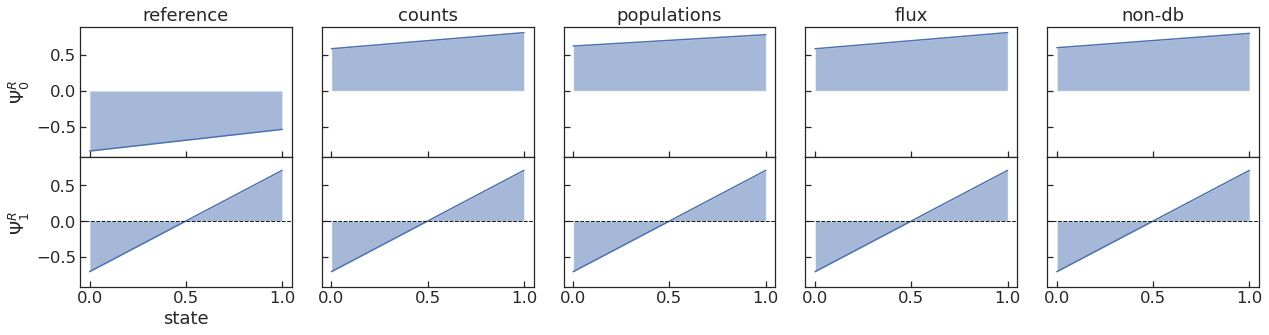

In [23]:
fig, ax = plt.subplots(2,5, figsize=(18,5), sharex=True, sharey=True)

# reference
ax[0,0].set_title('reference')
ax[0,0].plot(-msm_ala2.msms[lt].rvecsT[:,0])
ax[0,0].fill_between(range(len(msm_ala2.msms[lt].rvecsT[:,0])), \
                   -msm_ala2.msms[lt].rvecsT[:,0], 0, alpha=0.5)
ax[1,0].plot(msm_ala2.msms[lt].rvecsT[:,1])
ax[1,0].axhline(0,0,25, c='k', ls='--', lw=1)
ax[1,0].fill_between(range(len(msm_ala2.msms[lt].rvecsT[:,1])), \
                   msm_ala2.msms[lt].rvecsT[:,1], 0, alpha=0.5)

# counts
ax[0,1].set_title('counts')
ax[0,1].plot(-conc.anal.MSM.rvecsT[:,0])
ax[0,1].fill_between(range(len(conc.anal.MSM.rvecsT[:,0])), \
                   -conc.anal.MSM.rvecsT[:,0], 0, alpha=0.5)
ax[1,1].plot(conc.anal.MSM.rvecsT[:,1])
ax[1,1].axhline(0,0,25, c='k', ls='--', lw=1)
ax[1,1].fill_between(range(len(conc.anal.MSM.rvecsT[:,1])), \
                   conc.anal.MSM.rvecsT[:,1], 0, alpha=0.5)
# populations
ax[0,2].set_title('populations')
ax[0,2].plot(-conp.anal.MSM.rvecsT[:,0])
ax[0,2].fill_between(range(len(conp.anal.MSM.rvecsT[:,0])), \
                   -conp.anal.MSM.rvecsT[:,0], 0, alpha=0.5)
ax[1,2].plot(conp.anal.MSM.rvecsT[:,1])
ax[1,2].axhline(0,0,25, c='k', ls='--', lw=1)
ax[1,2].fill_between(range(len(conp.anal.MSM.rvecsT[:,1])), \
                   conp.anal.MSM.rvecsT[:,1], 0, alpha=0.5)

# flux
ax[0,3].set_title('flux')
ax[0,3].plot(-conf.anal.MSM.rvecsT[:,0])
ax[0,3].fill_between(range(len(conf.anal.MSM.rvecsT[:,0])), \
                 -conf.anal.MSM.rvecsT[:,0], 0, alpha=0.5)
ax[1,3].plot(conf.anal.MSM.rvecsT[:,1])
ax[1,3].axhline(0,0,25, c='k', ls='--', lw=1)
ax[1,3].fill_between(range(len(conf.anal.MSM.rvecsT[:,1])), \
                   conf.anal.MSM.rvecsT[:,1], 0, alpha=0.5)
# non detailed balance
ax[0,4].set_title('non-db')
ax[0,4].plot(-condb.anal.MSM.rvecsT[:,0])
ax[0,4].fill_between(range(len(condb.anal.MSM.rvecsT[:,0])), \
                   -condb.anal.MSM.rvecsT[:,0], 0, alpha=0.5)
ax[1,4].plot(condb.anal.MSM.rvecsT[:,1])
ax[1,4].axhline(0,0,25, c='k', ls='--', lw=1)
ax[1,4].fill_between(range(len(condb.anal.MSM.rvecsT[:,1])), \
                   condb.anal.MSM.rvecsT[:,1], 0, alpha=0.5)

# labels
#ax[1,0].set_xlim(0,25)
ax[-1,0].set_xlabel("state")
ax[0,0].set_ylabel("$\Psi^R_0$")
ax[1,0].set_ylabel("$\Psi^R_1$")
plt.tight_layout(h_pad=0)

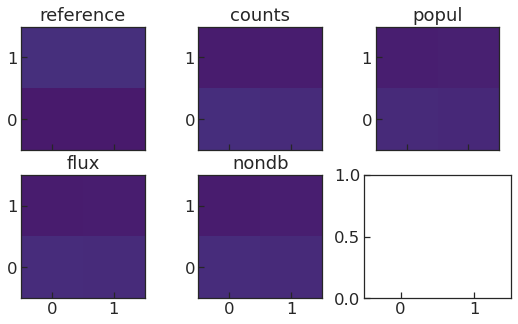

In [24]:
# TRANSITION matrix
fig, ax = plt.subplots(2, 3, figsize=(9,5), sharex=True)
ax[0,0].set_title('reference')
ax[0,0].imshow(np.log10(msm_ala2.msms[lt].trans), interpolation='none', \
    cmap='viridis_r', vmin=-3, vmax=0, origin='lower')
#_ = ax[0].colorbar()
ax[0,1].set_title('counts')
ax[0,1].imshow(np.log10(conc.anal.MSM.trans), interpolation='none', \
    cmap='viridis_r', vmin=-3, vmax=0, origin='lower')
ax[0,2].set_title('popul')
ax[0,2].imshow(np.log10(conp.anal.MSM.trans), interpolation='none', \
    cmap='viridis_r', vmin=-3, vmax=0, origin='lower')
ax[1,0].set_title('flux')
ax[1,0].imshow(np.log10(conf.anal.MSM.trans), interpolation='none', \
    cmap='viridis_r', vmin=-3, vmax=0, origin='lower')
ax[1,1].set_title('nondb')
ax[1,1].imshow(np.log10(condb.anal.MSM.trans), interpolation='none', \
    cmap='viridis_r', vmin=-3, vmax=0, origin='lower')